In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('combined_data.csv')
df.head()

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-11-01T06:29:30Z,24472394143,76,18,20,38,27,53,0.053635
1,2019-11-02T07:19:30Z,24486013387,79,20,22,37,36,53,0.078978
2,2019-11-03T07:34:30Z,24497341340,71,16,17,38,38,52,0.093491
3,2019-11-04T06:35:00Z,24507914069,68,15,15,38,37,53,0.064851
4,2019-11-05T06:25:00Z,24521896102,73,15,22,36,26,54,0.093185


In [137]:
df.deep_sleep_in_minutes.max()

183

In [3]:
df.shape

(1836, 9)

In [5]:
df.isnull().sum()

timestamp                0
sleep_log_entry_id       0
overall_score            0
composition_score        0
revitalization_score     0
duration_score           0
deep_sleep_in_minutes    0
resting_heart_rate       0
restlessness             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              1836 non-null   object 
 1   sleep_log_entry_id     1836 non-null   int64  
 2   overall_score          1836 non-null   int64  
 3   composition_score      1836 non-null   int64  
 4   revitalization_score   1836 non-null   int64  
 5   duration_score         1836 non-null   int64  
 6   deep_sleep_in_minutes  1836 non-null   int64  
 7   resting_heart_rate     1836 non-null   int64  
 8   restlessness           1836 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 129.2+ KB


In [7]:
df.describe()

,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
count,1.836000e+03,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,2.547399e+10,76.460784,19.247277,18.960784,38.252723,73.258170,58.583878,0.090687
std,5.802740e+08,7.795554,2.390916,3.316146,5.146081,27.728065,7.089620,0.037511
min,2.447239e+10,35.000000,12.000000,5.000000,3.000000,0.000000,44.000000,0.015385
25%,2.496905e+10,72.000000,17.000000,17.000000,35.000000,55.000000,53.000000,0.062388
50%,2.543212e+10,77.000000,19.500000,20.000000,39.000000,72.500000,59.000000,0.084501
75%,2.596353e+10,82.000000,21.000000,21.000000,42.000000,91.000000,65.000000,0.110432
max,2.654316e+10,94.000000,25.000000,25.000000,47.000000,183.000000,76.000000,0.294766


In [8]:
df.drop(['timestamp','sleep_log_entry_id','composition_score','revitalization_score','duration_score'],inplace=True,axis=1)

Exploratory Data Analysis

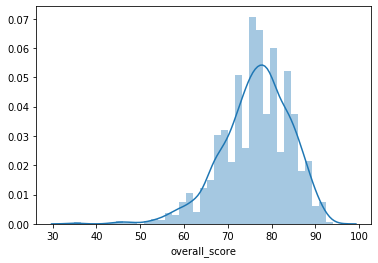

In [10]:
sns.distplot(df.overall_score,hist=True,label='SCORE DISTRIBUTION')

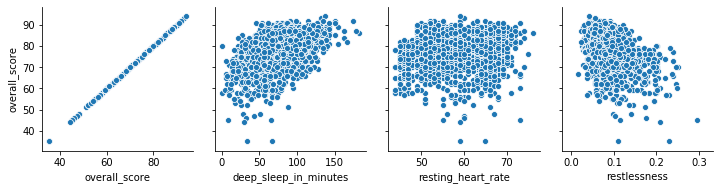

In [11]:
sns.pairplot(df,x_vars=df.columns,y_vars='overall_score')

<Figure size 720x432 with 0 Axes>

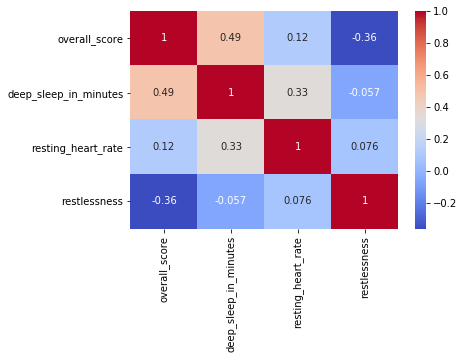

<Figure size 720x432 with 0 Axes>

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.figure(figsize=(10, 6))

In [9]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [10]:
X.head()

,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,27,53,0.053635
1,36,53,0.078978
2,38,52,0.093491
3,37,53,0.064851
4,26,54,0.093185


In [11]:
y.head()

0    76
1    79
2    71
3    68
4    73
Name: overall_score, dtype: int64

Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Feature Scaling of train set

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
    MinMax=MinMaxScaler()
    Scaled_X_train=MinMax.fit_transform(X_train)
    Scaled_X_train=pd.DataFrame(Scaled_X_train)

In [60]:
Scaled_X_train.columns=X_train.columns

In [61]:
Scaled_X_train.head()

,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,0.404372,0.65625,0.203199
1,0.469945,0.46875,0.074356
2,0.442623,0.87500,0.267109
3,0.612022,0.75000,0.516877
4,0.426230,0.46875,0.230089


In [62]:
Scaled_y_train=MinMax.fit_transform(y_train.values.reshape(-1,1))
Scaled_y_train=pd.DataFrame(Scaled_y_train)

Feature Scaling on test set

In [63]:
Scaled_X_test=MinMax.fit_transform(X_test)
Scaled_X_test=pd.DataFrame(Scaled_X_test)
Scaled_X_test.columns=X_test.columns

In [64]:
Scaled_y_test=MinMax.fit_transform(y_test.values.reshape(-1,1))
Scaled_y_test=pd.DataFrame(Scaled_y_test)

Model Training

In [21]:
from sklearn.linear_model import LinearRegression

In [65]:
lin_reg=LinearRegression()
lin_reg.fit(Scaled_X_train,Scaled_y_train)

LinearRegression()

In [66]:
lin_reg_pred=lin_reg.predict(Scaled_X_test)

Performance Metrics

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
def check_regression_metrics(y_test,y_pred):

    '''Prints the model performance metrics'''
    
    print("Model Performance:")
    print(f'Mean absolute error:{mean_absolute_error(y_test,y_pred):.3f}')
    print(f'Mean squared error:{mean_squared_error(y_test,y_pred):.3f}')
    print(f'R2 Score:{r2_score(y_test,y_pred):.3f}')

In [69]:
check_regression_metrics(Scaled_y_test,lin_reg_pred)

Model Performance:
Mean absolute error:0.079
Mean squared error:0.010
R2 Score:0.411


In [70]:
lin_reg_pred[:5]

array([[0.57218974],
       [0.49592328],
       [0.57152343],
       [0.84575349],
       [0.78824507]])

In [71]:
Scaled_y_test[:5]

,0
0,0.406780
1,0.610169
2,0.847458
3,0.694915
4,0.762712


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
rf_reg_pred=rf_reg.predict(X_test)

In [35]:
check_regression_metrics(y_test,rf_reg_pred)

Model Performance:
Mean absolute error:4.970
Mean squared error:39.984
R2 Score:0.334


Hyper Parameter Optimization

In [37]:
rf_n_estimators=[int(x) for x in np.linspace(200,1000,5)]

rf_max_depth=[int(x) for x in np.linspace(5,50,10)]

rf_max_features=['auto','sqrt','log']

rf_criterion=['mse','mae']

rf_min_samples_split=[int(x) for x in np.linspace(2,10,9)]

rf_bootstrap=[True,False]

In [57]:
rf_grid={
    'n_estimators':rf_n_estimators,
    'max_depth':rf_max_depth,
    'max_features':rf_max_features,
    'criterion':rf_criterion,
    'min_samples_split':rf_min_samples_split,
    'bootstrap':rf_bootstrap
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [197]:
rf=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_iter=20,cv=5,verbose=2,random_state=0)

In [200]:
rf_random.fit(X_train,y_train)

plit=8, max_features=auto, max_depth=15, criterion=mae, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=8, max_features=auto, max_depth=15, criterion=mae, bootstrap=True, total=  15.5s
[CV] n_estimators=1000, min_samples_split=6, max_features=auto, max_depth=25, criterion=mse, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=6, max_features=auto, max_depth=25, criterion=mse, bootstrap=False, total=   4.5s
[CV] n_estimators=1000, min_samples_split=6, max_features=auto, max_depth=25, criterion=mse, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=6, max_features=auto, max_depth=25, criterion=mse, bootstrap=False, total=   4.3s
[CV] n_estimators=1000, min_samples_split=6, max_features=auto, max_depth=25, criterion=mse, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=6, max_features=auto, max_depth=25, criterion=mse, bootstrap=False, total=   4.0s
[CV] n_estimators=1000, min_samples_split=6, max_features=auto, max_depth=25, criterion=mse, bootstr

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt', 'log'],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=0, verbose=2)

In [202]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 9,
 'max_features': 'sqrt',
 'max_depth': 15,
 'criterion': 'mae',
 'bootstrap': True}

In [36]:
rf_final=RandomForestRegressor(n_estimators=400,min_samples_split=9,max_features='sqrt',max_depth=15,criterion='mae',bootstrap=True)
rf_final.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=15, max_features='sqrt',
                      min_samples_split=9, n_estimators=400)

In [37]:
rf_final_pred=rf_final.predict(X_test)

In [114]:
check_regression_metrics(y_test,rf_final_pred)

Model Performance:
Mean absolute error:4.744
Mean squared error:35.881
R2 Score:0.402


In [127]:
import math

def final_comparison(models,X_test,y_test,Scaled_X_test,Scaled_y_test):
    scores=pd.DataFrame()

    for model in models:
        if model==lin_reg:
            predictions=model.predict(Scaled_X_test)
            mae=mean_absolute_error(Scaled_y_test,predictions)
            mse=mean_squared_error(Scaled_y_test,predictions)
            rmse=math.sqrt(mse)
            r2=r2_score(Scaled_y_test,predictions)
            errors=abs(predictions-Scaled_y_test)
            macc=100 * np.mean(errors/Scaled_y_test)
            accuracy=np.round(100-macc,4)
        else:
            predictions=model.predict(X_test)
            mae=mean_absolute_error(y_test,predictions)
            mse=mean_squared_error(y_test,predictions)
            rmse=math.sqrt(mse)
            r2=r2_score(y_test,predictions)
            errors=abs(predictions-y_test)
            macc=100 * np.mean(errors/y_test)
            accuracy=np.round(100-macc,4)
        scores[str(model)]=[mae,mse,r2,accuracy]
    scores.index=['Mean absolute error','RootMean squared error','R2 Score','Accuracy']
    return scores


In [128]:
final_scores=final_comparison([lin_reg,rf_reg,rf_final],X_test,y_test,Scaled_X_test,Scaled_y_test)

In [129]:
final_scores.columns=['Linear Regression', 'Random Forest', 'Optimized Random Forest']


Comparision of different models

In [130]:
final_scores

,Linear Regression,Random Forest,Optimized Random Forest
Mean absolute error,0.0786764,4.969511,4.743787
RootMean squared error,0.0101643,39.983682,35.880501
R2 Score,0.410758,0.334120,0.402453
Accuracy,0 -inf dtype: float64,93.213300,93.512100


In [132]:
import pickle

In [133]:
with open('linear_regression.pkl','wb') as f1:
    pickle.dump(lin_reg,f1)